In [428]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
import statistics
import math
from scipy import stats
from collections import Counter
warnings.filterwarnings("ignore", category=FutureWarning)

sns.set()

In [429]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [430]:
df_fifa_suja = pd.read_csv('/content/drive/MyDrive/dados/FIFA_data.csv', encoding='utf-8', sep=',')

In [431]:
# Para dar uma olhada geral: chamar o documento
df_fifa_suja

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18201,18201,243413,D. Walsh,18,https://cdn.sofifa.org/players/4/19/243413.png,Republic of Ireland,https://cdn.sofifa.org/flags/25.png,47,68,Waterford FC,...,43.0,44.0,47.0,53.0,9.0,10.0,9.0,11.0,13.0,€153K
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K


In [432]:
df_fifa_suja.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18206 entries, 0 to 18205
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18206 non-null  int64  
 1   ID                        18206 non-null  int64  
 2   Name                      18206 non-null  object 
 3   Age                       18206 non-null  int64  
 4   Photo                     18206 non-null  object 
 5   Nationality               18206 non-null  object 
 6   Flag                      18206 non-null  object 
 7   Overall                   18206 non-null  int64  
 8   Potential                 18206 non-null  int64  
 9   Club                      17965 non-null  object 
 10  Club Logo                 18206 non-null  object 
 11  Value                     18206 non-null  object 
 12  Wage                      18206 non-null  object 
 13  Special                   18206 non-null  int64  
 14  Prefer

In [433]:
# Excluir colunas que não serão utilizadas
list_drop_columns = [
'ID','Photo','Flag','Overall','Potential','Club Logo','Value','Wage','Special','International Reputation','Weak Foot','Skill Moves','Body Type','Real Face','Loaned From','Contract Valid Until','LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB','Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle','GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes','Release Clause']
df_fifa = df_fifa_suja.drop(columns=list_drop_columns)

df_fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18206 entries, 0 to 18205
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      18206 non-null  int64  
 1   Name            18206 non-null  object 
 2   Age             18206 non-null  int64  
 3   Nationality     18206 non-null  object 
 4   Club            17965 non-null  object 
 5   Preferred Foot  18158 non-null  object 
 6   Work Rate       18158 non-null  object 
 7   Position        18146 non-null  object 
 8   Jersey Number   18146 non-null  float64
 9   Joined          16653 non-null  object 
 10  Height          18158 non-null  object 
 11  Weight          18158 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 1.7+ MB


In [434]:
# Renomeando as colunas de forma a identificar mais facilmente
df_fifa = df_fifa.rename(columns={'Unnamed: 0':'ID','Name': 'Nome','Age':'Idade','Nationality':'Nacionalidade','Club':'Clube','Preferred Foot':'Pé Dominante','Work Rate':'Ritmo de Trabalho','Position':'Posição','Jersey Number':'Número da Camisa','Joined':'Começo','Height':'Altura','Weight':'Peso'})
df_fifa

,ID,Nome,Idade,Nacionalidade,Clube,Pé Dominante,Ritmo de Trabalho,Posição,Número da Camisa,Começo,Altura,Peso
0,0,L. Messi,31,Argentina,FC Barcelona,Left,Medium/ Medium,RF,10.0,"Jul 1, 2004",5'7,159lbs
1,1,Cristiano Ronaldo,33,Portugal,Juventus,Right,High/ Low,ST,7.0,"Jul 10, 2018",6'2,183lbs
2,2,Neymar Jr,26,Brazil,Paris Saint-Germain,Right,High/ Medium,LW,10.0,"Aug 3, 2017",5'9,150lbs
3,3,De Gea,27,Spain,Manchester United,Right,Medium/ Medium,GK,1.0,"Jul 1, 2011",6'4,168lbs
4,4,K. De Bruyne,27,Belgium,Manchester City,Right,High/ High,RCM,7.0,"Aug 30, 2015",5'11,154lbs
...,...,...,...,...,...,...,...,...,...,...,...,...
18201,18201,D. Walsh,18,Republic of Ireland,Waterford FC,Left,Medium/ Medium,RB,29.0,"Apr 20, 2018",6'1,168lbs
18202,18202,J. Lundstram,19,England,Crewe Alexandra,Right,Medium/ Medium,CM,22.0,"May 3, 2017",5'9,134lbs
18203,18203,N. Christoffersson,19,Sweden,Trelleborgs FF,Right,Medium/ Medium,ST,21.0,"Mar 19, 2018",6'3,170lbs
18204,18204,B. Worman,16,England,Cambridge United,Right,Medium/ Medium,ST,33.0,"Jul 1, 2017",5'8,148lbs


In [435]:
# Renomeando resultados que ainda não são totalmente entendiveis
df_fifa["Pé Dominante"] = df_fifa["Pé Dominante"].replace({"Left":"Esquerdo", "Right":"Direito"})
df_fifa["Posição"] = df_fifa["Posição"].replace({"RF":"Frente Direita", "ST":"Atacante","LW":"Lateral Esquerda","RW":"Lateral Direita","GK":"Goleiro","RCM":"Centro Direita","RB":"Defesa Direita","LB":"Defesa Esquerda","CM":"Centro","LF":"Frente Direita","RS":"Atacante Direita","RCB":"Direita Centro Atrás","RM":"Meia Direita","LCM":"Centro meio","CB":"Centro atras","LDM":"Defesa Meia","CAM":"Atacante Meia","CDM":"Defesa Central Meia","LS":"Atacante Esquerda","LCB":"Esquerda Meia Atrás","LAM":"Ataque Meia Esquerda","LM":"Meia Esquerda","RDM":"Defesa Meia","RAM":"Ataque Meia","CF":"Meia centro","RWB":"Contra-ataque Direita","LWB":"Contra-ataque Esquerda"})
df_fifa

,ID,Nome,Idade,Nacionalidade,Clube,Pé Dominante,Ritmo de Trabalho,Posição,Número da Camisa,Começo,Altura,Peso
0,0,L. Messi,31,Argentina,FC Barcelona,Esquerdo,Medium/ Medium,Frente Direita,10.0,"Jul 1, 2004",5'7,159lbs
1,1,Cristiano Ronaldo,33,Portugal,Juventus,Direito,High/ Low,Atacante,7.0,"Jul 10, 2018",6'2,183lbs
2,2,Neymar Jr,26,Brazil,Paris Saint-Germain,Direito,High/ Medium,Lateral Esquerda,10.0,"Aug 3, 2017",5'9,150lbs
3,3,De Gea,27,Spain,Manchester United,Direito,Medium/ Medium,Goleiro,1.0,"Jul 1, 2011",6'4,168lbs
4,4,K. De Bruyne,27,Belgium,Manchester City,Direito,High/ High,Centro Direita,7.0,"Aug 30, 2015",5'11,154lbs
...,...,...,...,...,...,...,...,...,...,...,...,...
18201,18201,D. Walsh,18,Republic of Ireland,Waterford FC,Esquerdo,Medium/ Medium,Defesa Direita,29.0,"Apr 20, 2018",6'1,168lbs
18202,18202,J. Lundstram,19,England,Crewe Alexandra,Direito,Medium/ Medium,Centro,22.0,"May 3, 2017",5'9,134lbs
18203,18203,N. Christoffersson,19,Sweden,Trelleborgs FF,Direito,Medium/ Medium,Atacante,21.0,"Mar 19, 2018",6'3,170lbs
18204,18204,B. Worman,16,England,Cambridge United,Direito,Medium/ Medium,Atacante,33.0,"Jul 1, 2017",5'8,148lbs


In [436]:
# Conferindo se renomeei todas as Posições de forma correta
df_fifa["Posição"].unique()

array(['Frente Direita', 'Atacante', 'Lateral Esquerda', 'Goleiro',
       'Centro Direita', 'Atacante Direita', 'Direita Centro Atrás',
       'Centro meio', 'Centro atras', 'Defesa Meia', 'Atacante Meia',
       'Defesa Central Meia', 'Atacante Esquerda', 'Esquerda Meia Atrás',
       'Meia Direita', 'Ataque Meia Esquerda', 'Meia Esquerda',
       'Defesa Esquerda', 'Lateral Direita', 'Centro', 'Defesa Direita',
       'Ataque Meia', 'Meia centro', 'Contra-ataque Direita',
       'Contra-ataque Esquerda', nan], dtype=object)

In [437]:
# Retirando o ' da altura e o peso retirando o lbs
df_fifa["Peso"] = df_fifa["Peso"].str.replace('lbs', '')
df_fifa["Altura"] = df_fifa["Altura"].str.replace("'", ".")
df_fifa

,ID,Nome,Idade,Nacionalidade,Clube,Pé Dominante,Ritmo de Trabalho,Posição,Número da Camisa,Começo,Altura,Peso
0,0,L. Messi,31,Argentina,FC Barcelona,Esquerdo,Medium/ Medium,Frente Direita,10.0,"Jul 1, 2004",5.7,159
1,1,Cristiano Ronaldo,33,Portugal,Juventus,Direito,High/ Low,Atacante,7.0,"Jul 10, 2018",6.2,183
2,2,Neymar Jr,26,Brazil,Paris Saint-Germain,Direito,High/ Medium,Lateral Esquerda,10.0,"Aug 3, 2017",5.9,150
3,3,De Gea,27,Spain,Manchester United,Direito,Medium/ Medium,Goleiro,1.0,"Jul 1, 2011",6.4,168
4,4,K. De Bruyne,27,Belgium,Manchester City,Direito,High/ High,Centro Direita,7.0,"Aug 30, 2015",5.11,154
...,...,...,...,...,...,...,...,...,...,...,...,...
18201,18201,D. Walsh,18,Republic of Ireland,Waterford FC,Esquerdo,Medium/ Medium,Defesa Direita,29.0,"Apr 20, 2018",6.1,168
18202,18202,J. Lundstram,19,England,Crewe Alexandra,Direito,Medium/ Medium,Centro,22.0,"May 3, 2017",5.9,134
18203,18203,N. Christoffersson,19,Sweden,Trelleborgs FF,Direito,Medium/ Medium,Atacante,21.0,"Mar 19, 2018",6.3,170
18204,18204,B. Worman,16,England,Cambridge United,Direito,Medium/ Medium,Atacante,33.0,"Jul 1, 2017",5.8,148


In [438]:
# Definindo Peso para valor float e não string ou object como veio
df_fifa['Peso']=df_fifa['Peso'].astype(float)

In [439]:
# Definindo Altura para valor float e não string ou object como veio
df_fifa['Altura']=df_fifa['Altura'].astype(float)

In [440]:
# Ajustando a data
df_fifa['Começo'] = pd.to_datetime(df_fifa['Começo'])

In [441]:
df_fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18206 entries, 0 to 18205
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 18206 non-null  int64         
 1   Nome               18206 non-null  object        
 2   Idade              18206 non-null  int64         
 3   Nacionalidade      18206 non-null  object        
 4   Clube              17965 non-null  object        
 5   Pé Dominante       18158 non-null  object        
 6   Ritmo de Trabalho  18158 non-null  object        
 7   Posição            18146 non-null  object        
 8   Número da Camisa   18146 non-null  float64       
 9   Começo             16653 non-null  datetime64[ns]
 10  Altura             18158 non-null  float64       
 11  Peso               18158 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 1.7+ MB


In [442]:
# Multiplicando as libras por 0,453592 para ter em kg
df_fifa['Peso'] = df_fifa['Peso'].apply(lambda x: x*0.453592)

In [443]:
# Multiplicando os pés por 30,48 para ter em cm
df_fifa['Altura'] = df_fifa['Altura'].apply(lambda y: y*30,48)

In [444]:
df_fifa

,ID,Nome,Idade,Nacionalidade,Clube,Pé Dominante,Ritmo de Trabalho,Posição,Número da Camisa,Começo,Altura,Peso
0,0,L. Messi,31,Argentina,FC Barcelona,Esquerdo,Medium/ Medium,Frente Direita,10.0,2004-07-01,171.0,72.121128
1,1,Cristiano Ronaldo,33,Portugal,Juventus,Direito,High/ Low,Atacante,7.0,2018-07-10,186.0,83.007336
2,2,Neymar Jr,26,Brazil,Paris Saint-Germain,Direito,High/ Medium,Lateral Esquerda,10.0,2017-08-03,177.0,68.038800
3,3,De Gea,27,Spain,Manchester United,Direito,Medium/ Medium,Goleiro,1.0,2011-07-01,192.0,76.203456
4,4,K. De Bruyne,27,Belgium,Manchester City,Direito,High/ High,Centro Direita,7.0,2015-08-30,153.3,69.853168
...,...,...,...,...,...,...,...,...,...,...,...,...
18201,18201,D. Walsh,18,Republic of Ireland,Waterford FC,Esquerdo,Medium/ Medium,Defesa Direita,29.0,2018-04-20,183.0,76.203456
18202,18202,J. Lundstram,19,England,Crewe Alexandra,Direito,Medium/ Medium,Centro,22.0,2017-05-03,177.0,60.781328
18203,18203,N. Christoffersson,19,Sweden,Trelleborgs FF,Direito,Medium/ Medium,Atacante,21.0,2018-03-19,189.0,77.110640
18204,18204,B. Worman,16,England,Cambridge United,Direito,Medium/ Medium,Atacante,33.0,2017-07-01,174.0,67.131616


Aqui terminamos a limpeza dos dados. Tendo assim as informações como eu quero que sejam trabalhadas.

In [445]:
df_fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18206 entries, 0 to 18205
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 18206 non-null  int64         
 1   Nome               18206 non-null  object        
 2   Idade              18206 non-null  int64         
 3   Nacionalidade      18206 non-null  object        
 4   Clube              17965 non-null  object        
 5   Pé Dominante       18158 non-null  object        
 6   Ritmo de Trabalho  18158 non-null  object        
 7   Posição            18146 non-null  object        
 8   Número da Camisa   18146 non-null  float64       
 9   Começo             16653 non-null  datetime64[ns]
 10  Altura             18158 non-null  float64       
 11  Peso               18158 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 1.7+ MB


Dicionário:
Antes de começar a descrever queria deixar claro que tentei deixar o mais auto explicativo possivel, por essa razão estou descrevendo apenas por formalidade.


*   ID: Id do jogador, para termos a contagem de quantos jogadores há na lista
*   Nome: Nome do jogador
*   Idade: Idade do jogador
*   Nacionalidade: Nacionalidade do jogador
*   Clube: Clube em que o jogador joga
*   Pé Dominante: qual é o pé dominante do jogador
*   Ritmo de trabalho: Nivel de esforço do jogador nos jogos
*   Posição: Em que posição jogam
*   Número da Camisa: Número que utilizam no time
*   Começo: Quando começaram a jogar
*   Altura: Altura do jogador
*   Peso: Peso do jogador

















In [446]:
# Quantia total de jogadores na lista
print("Quantia de jogadores avaliados na planilha: " + str(df_fifa.shape[0]))

Quantia de jogadores avaliados na planilha: 18206


In [447]:
# Média aritmética de idade, altura e peso dos jogadores
Peso = df_fifa['Peso']
Altura = df_fifa['Altura']
Idade = df_fifa['Idade']
MediaPeso = Peso.mean()
MediaAltura = Altura.mean()
MediaIdade = Idade.mean()
print("A média de peso dos jogadores é: ",MediaPeso,"Kg")
print("A média de altura dos jogadores é: ",MediaAltura,"cm")
print("A média de idade dos jogadores é: ",MediaIdade,"anos")

A média de peso dos jogadores é:  75.28655466945699 Kg
A média de altura dos jogadores é:  173.92216653816502 cm
A média de idade dos jogadores é:  25.12270679995606 anos


In [448]:
# Mediana de idade, altura e peso dos jogadores
MedianaPeso = Peso.median()
MedianaAltura = Altura.median()
MedianaIdade = Idade.median()
print("A mediana dos pesos dos jogadores é: ",MedianaPeso,"Kg")
print("A mediana das alturas dos jogadores é: ",MedianaAltura,"cm")
print("A mediana das idades dos jogadores é: ",MedianaIdade,"anos")

A mediana dos pesos dos jogadores é:  74.84268 Kg
A mediana das alturas dos jogadores é:  177.0 cm
A mediana das idades dos jogadores é:  25.0 anos


In [449]:
# Moda de idade, altura e peso dos jogadores
ModaPeso = Peso.mode()
ModaAltura = Altura.mode()
ModaIdade = Idade.mode()
print("A moda dos pesos dos jogadores é: ",ModaPeso,"Kg")
print("A moda das alturas dos jogadores é: ",ModaAltura,"cm")
print("A moda das idades dos jogadores é: ",ModaIdade,"anos")

A moda dos pesos dos jogadores é:  0    74.84268
dtype: float64 Kg
A moda das alturas dos jogadores é:  0    180.0
dtype: float64 cm
A moda das idades dos jogadores é:  0    21
dtype: int64 anos


In [464]:
# Desvio padrão de idade, altura e peso dos jogadores
DesvioPeso = statistics.pstdev(Peso)
DesvioAltura = statistics.pstdev(Altura)
DesvioIdade = statistics.pstdev(Idade)
print("O desvio padrão do peso dos jogadores é: ",ModaPeso,"Kg")
print("O desvio padrão das alturas dos jogadores é: ",ModaAltura,"cm")
print("O desvio padrão idades dos jogadores é: ",ModaIdade,"anos")

O desvio padrão do peso dos jogadores é:  0    74.84268
dtype: float64 Kg
O desvio padrão das alturas dos jogadores é:  0    180.0
dtype: float64 cm
O desvio padrão idades dos jogadores é:  0    21
dtype: int64 anos


In [450]:
# Podemos tambem puxar a nacionalidade que mais aparece que no caso é a inglaterra
Nacionalidades = df_fifa['Nacionalidade']
ModaNacionalidade = Nacionalidades.mode()
print(ModaNacionalidade)

0    England
dtype: object


Agora vamos começar com os gráficos, primeiro alguns sobre tópicos

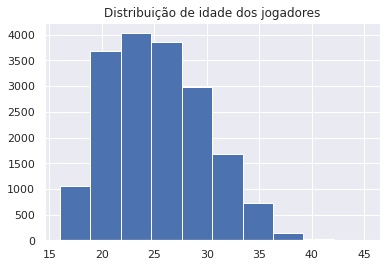

In [451]:
# Histograma de idade
Idade.hist(bins=10)
plt.title('Distribuição de idade dos jogadores')
plt.show()

Aqui já podemos ter uma noção de que a idade dos jogadores é maior entre 20 e 25 anos (o pico da idade hahaha).

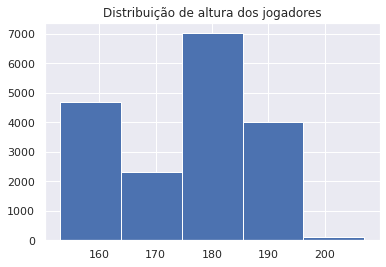

In [452]:
# Histograma de altura
Altura.hist(bins=5)
plt.title('Distribuição de altura dos jogadores')
plt.show()

A maior parte dos jogadores é alto, possui por volta de 1,80, porem os baixinhos tambem tem vez e os com 1.60 jogam bastante.

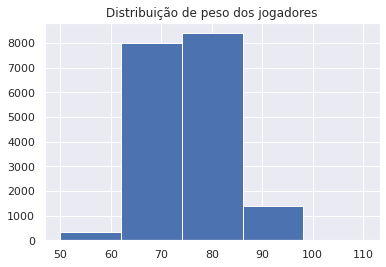

In [453]:
# Histograma de peso
Peso.hist(bins=5)
plt.title('Distribuição de peso dos jogadores')
plt.show()

Uma curiosidade é que o Neymar pesava pouco no inicio da carreira e por isso caia tanto, hoje se tornou mais um costume mas como podemos analisar no gráfico a pesagem dos jogadores se concentra nos 70~80 kg.

In [454]:
df_fifa["Nacionalidade"].unique()

array(['Argentina', 'Portugal', 'Brazil', 'Spain', 'Belgium', 'Croatia',
       'Uruguay', 'Slovenia', 'Poland', 'Germany', 'France', 'England',
       'Italy', 'Egypt', 'Colombia', 'Denmark', 'Gabon', 'Wales',
       'Senegal', 'Costa Rica', 'Slovakia', 'Netherlands',
       'Bosnia Herzegovina', 'Morocco', 'Serbia', 'Algeria', 'Austria',
       'Greece', 'Chile', 'Sweden', 'Korea Republic', 'Finland', 'Guinea',
       'Montenegro', 'Armenia', 'Switzerland', 'Norway', 'Czech Republic',
       'Scotland', 'Ghana', 'Central African Rep.', 'DR Congo',
       'Ivory Coast', 'Russia', 'Ukraine', 'Iceland', 'Mexico', 'Jamaica',
       'Albania', 'Venezuela', 'Japan', 'Turkey', 'Ecuador', 'Paraguay',
       'Mali', 'Nigeria', 'Cameroon', 'Dominican Republic', 'Israel',
       'Kenya', 'Hungary', 'Republic of Ireland', 'Romania',
       'United States', 'Cape Verde', 'Australia', 'Peru', 'Togo',
       'Syria', 'Zimbabwe', 'Angola', 'Burkina Faso', 'Iran', 'Estonia',
       'Tunisia', 'Equato

In [455]:
# Agrupando as nacionalidades
Nacionalidades = df_fifa.groupby('Nacionalidade')

In [456]:
# Testando
Nacionalidades.get_group('Brazil').head(10)

,ID,Nome,Idade,Nacionalidade,Clube,Pé Dominante,Ritmo de Trabalho,Posição,Número da Camisa,Começo,Altura,Peso
2,2,Neymar Jr,26,Brazil,Paris Saint-Germain,Direito,High/ Medium,Lateral Esquerda,10.0,2017-08-03,177.0,68.038800
27,27,Casemiro,26,Brazil,Real Madrid,Direito,Medium/ High,Defesa Central Meia,14.0,2013-07-11,183.0,83.914520
32,32,Coutinho,26,Brazil,FC Barcelona,Direito,High/ High,Lateral Esquerda,7.0,2018-01-06,174.0,68.038800
35,35,Marcelo,30,Brazil,Real Madrid,Esquerdo,High/ Low,Defesa Esquerda,12.0,2007-01-01,177.0,79.832192
39,39,Thiago Silva,33,Brazil,Paris Saint-Germain,Direito,Medium/ High,Direita Centro Atrás,2.0,2012-07-01,180.0,82.100152
57,57,Ederson,24,Brazil,Manchester City,Esquerdo,Medium/ Medium,Goleiro,31.0,2017-07-01,186.0,86.182480
61,61,Roberto Firmino,26,Brazil,Liverpool,Direito,High/ High,Atacante Meia,9.0,2015-07-06,153.3,76.203456
64,64,Alex Sandro,27,Brazil,Juventus,Esquerdo,High/ High,Defesa Esquerda,12.0,2015-08-21,153.3,79.832192
65,65,Douglas Costa,27,Brazil,Juventus,Esquerdo,High/ Medium,Meia Esquerda,11.0,2018-07-01,174.0,69.853168
75,75,Fernandinho,33,Brazil,Manchester City,Direito,Medium/ High,Defesa Central Meia,25.0,2013-07-01,153.0,67.131616


In [457]:
# Quantos jogadores de cada país
df_fifa['Nacionalidade'].value_counts()

England                 1661
Germany                 1198
Spain                   1072
Argentina                937
France                   914
                        ... 
New Caledonia              1
Fiji                       1
São Tomé & Príncipe        1
United Arab Emirates       1
Botswana                   1
Name: Nacionalidade, Length: 164, dtype: int64

In [461]:
Brazil = df_fifa.loc[df_fifa['Nacionalidade'] == 'Brazil']
Argentina = df_fifa.loc[df_fifa['Nacionalidade'] == 'Argentina']
Portugal = df_fifa.loc[df_fifa['Nacionalidade'] == 'Portugal']
Italia = df_fifa.loc[df_fifa['Nacionalidade'] == 'Italy']
Franca = df_fifa.loc[df_fifa['Nacionalidade'] == 'France']
Mexico = df_fifa.loc[df_fifa['Nacionalidade'] == 'Mexico']

In [462]:
# Agrupando
Rivais = pd.concat([Brazil,Argentina])
GrupoA = pd.concat([Brazil,Argentina,Portugal,Italia,Franca,Mexico])

In [460]:
Rivais

,ID,Nome,Idade,Nacionalidade,Clube,Pé Dominante,Ritmo de Trabalho,Posição,Número da Camisa,Começo,Altura,Peso
2,2,Neymar Jr,26,Brazil,Paris Saint-Germain,Direito,High/ Medium,Lateral Esquerda,10.0,2017-08-03,177.0,68.038800
27,27,Casemiro,26,Brazil,Real Madrid,Direito,Medium/ High,Defesa Central Meia,14.0,2013-07-11,183.0,83.914520
32,32,Coutinho,26,Brazil,FC Barcelona,Direito,High/ High,Lateral Esquerda,7.0,2018-01-06,174.0,68.038800
35,35,Marcelo,30,Brazil,Real Madrid,Esquerdo,High/ Low,Defesa Esquerda,12.0,2007-01-01,177.0,79.832192
39,39,Thiago Silva,33,Brazil,Paris Saint-Germain,Direito,Medium/ High,Direita Centro Atrás,2.0,2012-07-01,180.0,82.100152
...,...,...,...,...,...,...,...,...,...,...,...,...
17349,17349,T. Durso,19,Argentina,Gimnasia y Esgrima La Plata,Direito,Medium/ Medium,Goleiro,1.0,2017-06-30,183.0,79.832192
17355,17355,V. Barbero,17,Argentina,Belgrano de Córdoba,Direito,Medium/ Medium,Atacante,9.0,2018-10-08,180.0,74.842680
17638,17638,E. Alarcón,25,Argentina,Patronato,Direito,Medium/ Medium,Goleiro,12.0,2016-09-10,180.0,74.842680
17861,17861,F. Bustamante,19,Argentina,Club Atlético Tigre,Direito,Medium/ Medium,Meia Direita,18.0,2018-07-01,168.0,64.863656


In [463]:
GrupoA

,ID,Nome,Idade,Nacionalidade,Clube,Pé Dominante,Ritmo de Trabalho,Posição,Número da Camisa,Começo,Altura,Peso
2,2,Neymar Jr,26,Brazil,Paris Saint-Germain,Direito,High/ Medium,Lateral Esquerda,10.0,2017-08-03,177.0,68.038800
27,27,Casemiro,26,Brazil,Real Madrid,Direito,Medium/ High,Defesa Central Meia,14.0,2013-07-11,183.0,83.914520
32,32,Coutinho,26,Brazil,FC Barcelona,Direito,High/ High,Lateral Esquerda,7.0,2018-01-06,174.0,68.038800
35,35,Marcelo,30,Brazil,Real Madrid,Esquerdo,High/ Low,Defesa Esquerda,12.0,2007-01-01,177.0,79.832192
39,39,Thiago Silva,33,Brazil,Paris Saint-Germain,Direito,Medium/ High,Direita Centro Atrás,2.0,2012-07-01,180.0,82.100152
...,...,...,...,...,...,...,...,...,...,...,...,...
17373,17373,R. Gutiérrez,22,Mexico,Monarcas Morelia,Direito,Medium/ Medium,Goleiro,33.0,2018-07-01,153.3,76.203456
17614,17614,A. Ocejo,20,Mexico,Santos Laguna,Esquerdo,Medium/ Medium,Meia Esquerda,86.0,2017-07-01,153.3,71.213944
18037,18037,C. Landa,19,Mexico,Tiburones Rojos de Veracruz,Esquerdo,Medium/ Medium,Centro,34.0,2018-06-01,180.0,78.925008
18068,18068,J. García,20,Mexico,Santos Laguna,Direito,Medium/ Medium,Goleiro,92.0,2017-07-01,183.0,72.121128


In [483]:
idadeBrazil = Brazil['Idade']
idadeArgentina = Argentina['Idade']
idadeRivais = Rivais['Idade']
pesoBrazil = Brazil['Peso']
pesoArgentina = Argentina['Peso']
pesoRivais = Rivais['Peso']
pesoGrupoA = GrupoA['Peso']
idadeGrupoA = GrupoA['Idade']
alturaGrupoA = GrupoA['Altura']

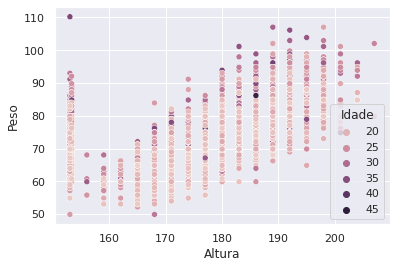

In [493]:
warnings.filterwarnings("ignore", category=FutureWarning)
sns.scatterplot(data=df_fifa, x=df_fifa['Altura'], y=df_fifa['Peso'], hue=df_fifa['Idade'])

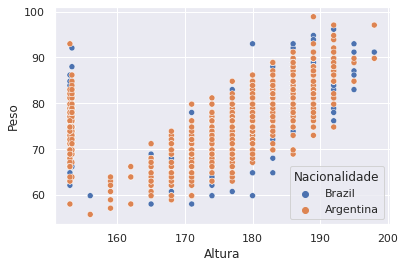

In [491]:
warnings.filterwarnings("ignore", category=FutureWarning)
sns.scatterplot(data=df_fifa, x=Rivais['Altura'], y=Rivais['Peso'], hue=Rivais['Nacionalidade'])

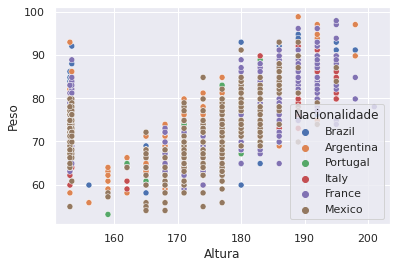

In [490]:
warnings.filterwarnings("ignore", category=FutureWarning)
sns.scatterplot(data=df_fifa, x=GrupoA['Altura'], y=GrupoA['Peso'], hue=GrupoA['Nacionalidade'])

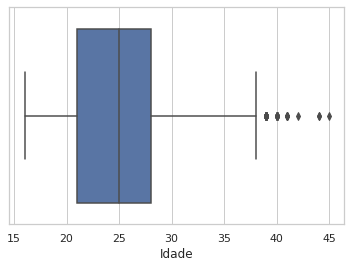

In [494]:
# Aqui podemos identificar os outliners que são a galera acima de ~38
sns.set_theme(style="whitegrid")

ax = sns.boxplot(x=df_fifa["Idade"])

In [496]:
import plotly.express as px
# Neste aqui podemos descobrir que o Brasil prefere jogadores entre 25 e 30 e mais novos proximos aos 18 e os mais velhos de 40 são exceções
fig = px.box(Rivais, x="Idade", y="Nacionalidade")
fig.show()

Vamos ver o heatmap

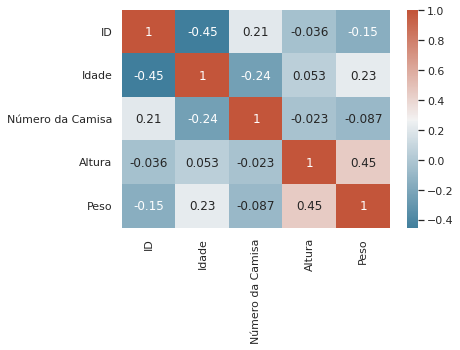

In [499]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df_fifa.corr(),cmap=cmap, annot=True);

Chegamos a conlusão que não ha quase nenhuma correlação, porem vamos insistir e ver de outra forma

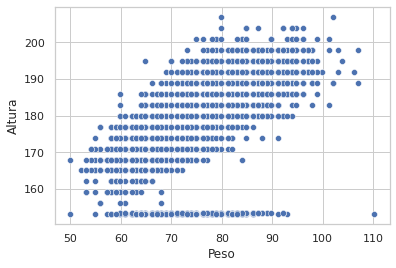

In [500]:
sns.scatterplot(data=df_fifa, x=df_fifa['Peso'], y=df_fifa['Altura'])

Neste grafico conseguimos ver que até tem uma correlação, mas não é tão forte

In [502]:
grafico =  px.histogram (Rivais,  x = "Altura", nbins=15, color='Nacionalidade') 
grafico.update_layout(width=500,height=500,title_text='Distribuição de Altura por Nacionalidade',
                      title_font_color = 'black') 
grafico.show()

Os Argentinos são mais altos

In [503]:
grafico =  px.histogram (Rivais,  x = "Idade", nbins=15, color='Nacionalidade') 
grafico.update_layout(width=500,height=500,title_text='Distribuição de Idade por Nacionalidade',
                      title_font_color = 'black') 
grafico.show()

E mais velhos

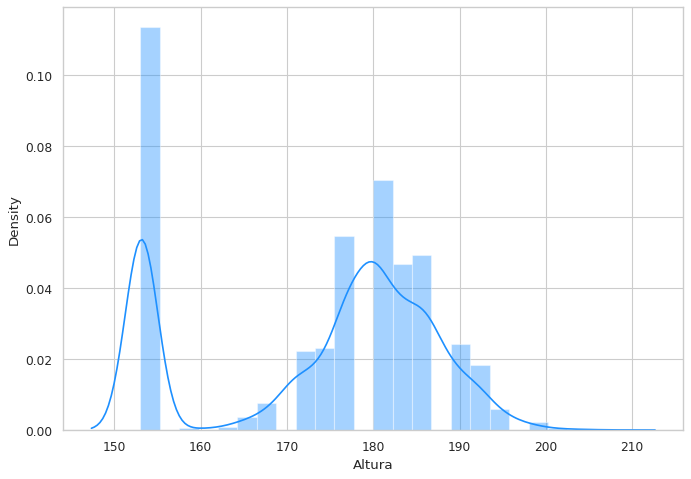

In [506]:
plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(df_fifa['Altura'], color="dodgerblue", label="Compact",)

plt.show()

Não há uma normalidade nas alturas

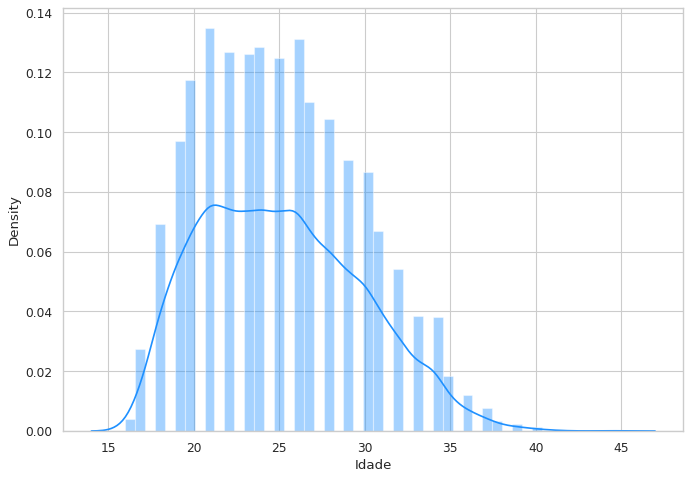

In [507]:
plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(df_fifa['Idade'], color="dodgerblue", label="Compact",)

plt.show()

Já na idade vemos que possue uma normalidade